# scikit-learn

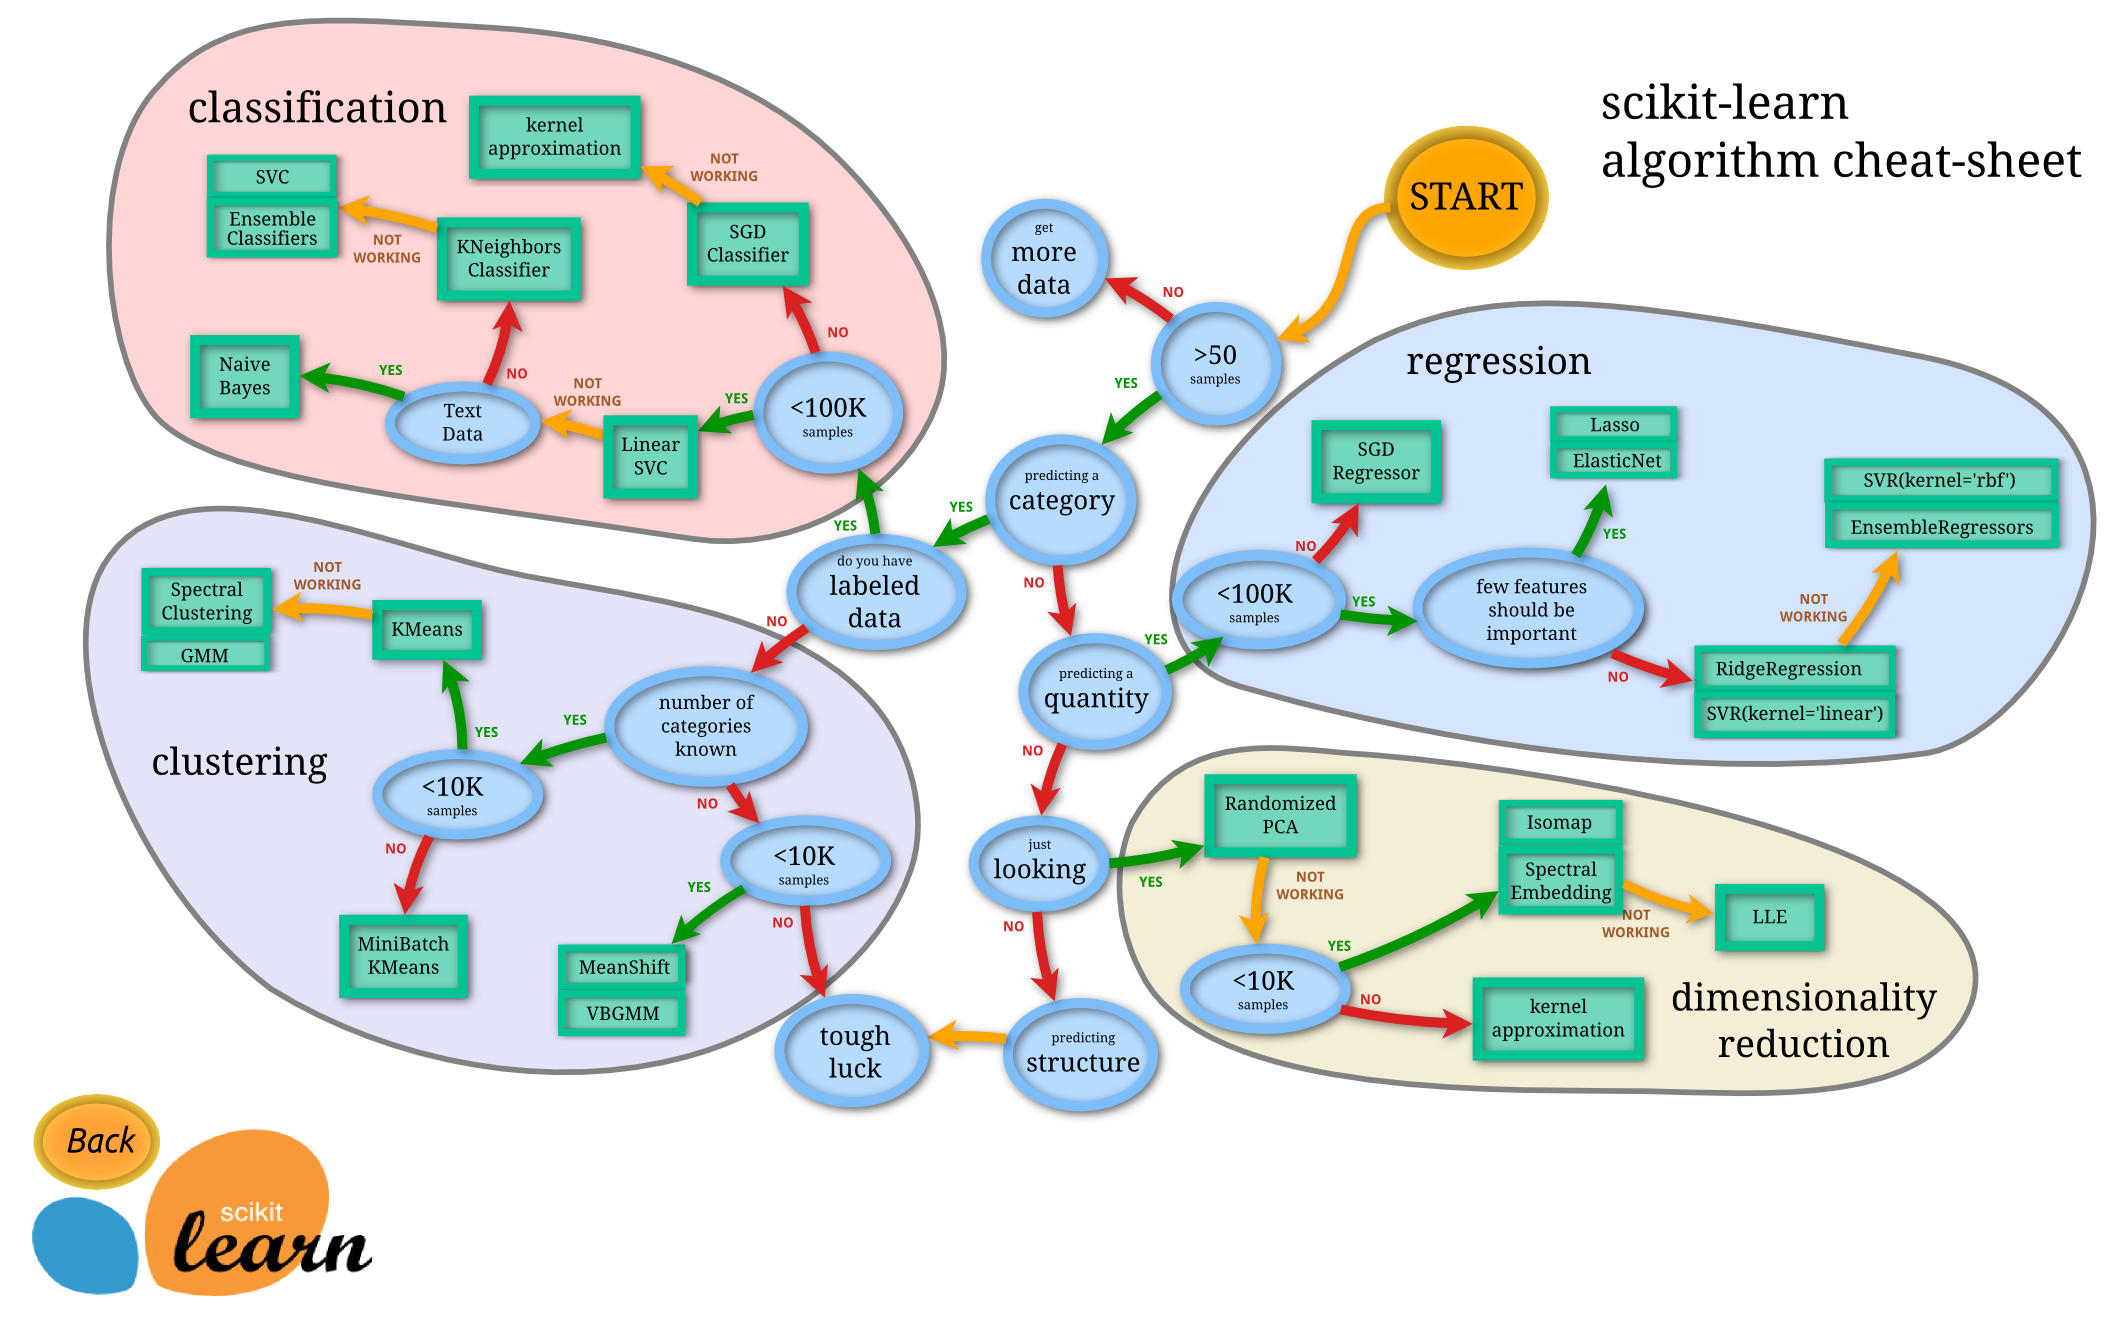

In [1]:
from IPython.display import Image
Image('ml_map.png')

## Regressão Linear Simples

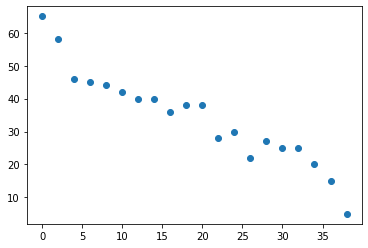

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperaturas = np.array(range(0, 40, 2))
temperaturas = temperaturas.reshape(-1, 1)
vendas = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperaturas, vendas, 'o')
plt.show()

In [3]:
regressaoLinear = LinearRegression()

In [4]:
# Treinando o modelo
regressaoLinear.fit(temperaturas,vendas)

LinearRegression()

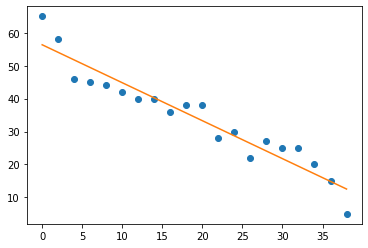

In [5]:
previsao_vendas = regressaoLinear.predict(temperaturas)
plt.plot(temperaturas, vendas, 'o')
plt.plot(temperaturas,previsao_vendas)
plt.show()

In [10]:
#Prevendo o número de casacos vendidos
print("%.2f" %regressaoLinear.predict([[43]]))

6.80


In [11]:
regressaoLinear.coef_

array([-1.15225564])

In [12]:
regressaoLinear.intercept_

56.342857142857156

### Coficiente de determinação (R²)

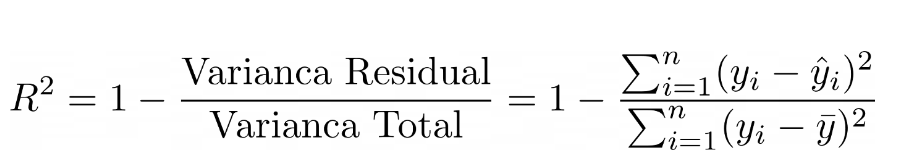

In [13]:
Image('r2.png')

#### ŷ representa o valor predito, y_barra representa o valor médio das amostras e yi representa o valor real.

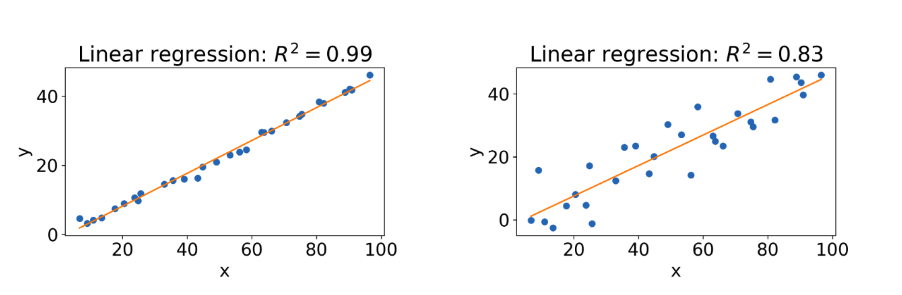

In [14]:
Image('r2_gráficos.png')

#### Na imagem acima, podemos ver que se o modelo (reta) não se distancia muito dos dados, temos um valor de R-Quadrado alto (gráfico 1), em contraste com o gráfico 2.

In [15]:
# em metrics, temos quase todas as metricas geralmete utilizadas
from sklearn.metrics import r2_score 

R2 = r2_score(vendas,previsao_vendas)
print(R2)


0.9114088011031334


## Regressão Linear Múltipla

In [16]:
import pandas as pd

In [17]:
moradias = pd.read_csv('moradias.csv')
moradias.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [18]:
moradias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [19]:
x = moradias[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = moradias[['rent']]

In [20]:
#Dividindo o conjunto entre treinamento e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


In [22]:
regressaoMultipla = LinearRegression()
regressaoMultipla.fit(x_train, y_train)

LinearRegression()

In [23]:
dadosImovel = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

previsao_aluguel = regressaoMultipla.predict(dadosImovel)

print("Previsão preço do Aluguel: $%.2f" % previsao_aluguel)

Previsão preço do Aluguel: $2459.03


In [24]:
y_previsto = regressaoMultipla.predict(x_test)

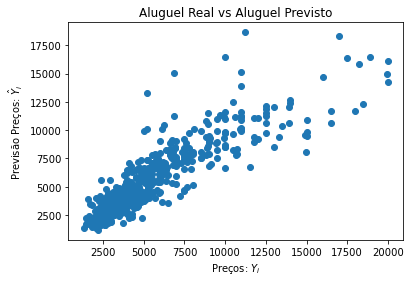

In [25]:
plt.scatter(y_test, y_previsto)

plt.xlabel("Preços: $Y_i$")
plt.ylabel("Previsão Preços: $\hat{Y}_i$")
plt.title("Aluguel Real vs Aluguel Previsto")

plt.show()

In [26]:
#Coficiente de determinação (R²)
R2 = r2_score(y_test,y_previsto)
print(R2)

0.7872099003554064


In [27]:
moradias.corr()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rental_id,1.000000,-0.134347,-0.070290,-0.109414,-0.107711,0.009615,-0.082586,0.028543,0.064919,-0.023335,-0.072738,-0.057786,-0.060152,-0.029615,-0.004253,-0.023457
rent,-0.134347,1.000000,0.638336,0.769474,0.857954,0.035164,0.215867,-0.128895,-0.101497,0.035165,0.053873,0.031302,0.051860,0.052241,0.029302,0.040609
bedrooms,-0.070290,0.638336,1.000000,0.720885,0.771263,0.076543,0.043539,0.037228,-0.100352,0.002938,0.008721,-0.017331,-0.006771,0.005467,0.003037,-0.004112
bathrooms,-0.109414,0.769474,0.720885,1.000000,0.803627,0.086932,0.127969,-0.095421,-0.062205,0.019556,0.025752,0.014745,0.021150,0.038829,0.042304,0.029739
size_sqft,-0.107711,0.857954,0.771263,0.803627,1.000000,0.039448,0.107186,0.014489,-0.141451,0.024822,0.038263,0.026098,0.040916,0.050364,0.021921,0.029347
min_to_subway,0.009615,0.035164,0.076543,0.086932,0.039448,1.000000,0.082445,-0.184682,0.080088,-0.020693,-0.001327,-0.009012,-0.000410,-0.012244,0.001500,-0.004315
floor,-0.082586,0.215867,0.043539,0.127969,0.107186,0.082445,1.000000,-0.389260,0.104317,0.056322,0.038870,0.095963,0.068917,0.002337,0.059423,0.065410
building_age_yrs,0.028543,-0.128895,0.037228,-0.095421,0.014489,-0.184682,-0.389260,1.000000,-0.221429,-0.041305,-0.030014,-0.047265,-0.060627,-0.027420,-0.050321,-0.063110
no_fee,0.064919,-0.101497,-0.100352,-0.062205,-0.141451,0.080088,0.104317,-0.221429,1.000000,-0.095718,-0.070324,-0.182547,-0.161519,-0.078660,-0.049684,-0.101230
has_roofdeck,-0.023335,0.035165,0.002938,0.019556,0.024822,-0.020693,0.056322,-0.041305,-0.095718,1.000000,0.313459,0.489836,0.516534,0.331999,0.122568,0.561626


In [28]:
corr = moradias.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rental_id,1.00,-0.13,-0.07,-0.11,-0.11,0.01,-0.08,0.03,0.06,-0.02,-0.07,-0.06,-0.06,-0.03,-0.00,-0.02
rent,-0.13,1.00,0.64,0.77,0.86,0.04,0.22,-0.13,-0.10,0.04,0.05,0.03,0.05,0.05,0.03,0.04
bedrooms,-0.07,0.64,1.00,0.72,0.77,0.08,0.04,0.04,-0.10,0.00,0.01,-0.02,-0.01,0.01,0.00,-0.00
bathrooms,-0.11,0.77,0.72,1.00,0.80,0.09,0.13,-0.10,-0.06,0.02,0.03,0.01,0.02,0.04,0.04,0.03
size_sqft,-0.11,0.86,0.77,0.80,1.00,0.04,0.11,0.01,-0.14,0.02,0.04,0.03,0.04,0.05,0.02,0.03
min_to_subway,0.01,0.04,0.08,0.09,0.04,1.00,0.08,-0.18,0.08,-0.02,-0.00,-0.01,-0.00,-0.01,0.00,-0.00
floor,-0.08,0.22,0.04,0.13,0.11,0.08,1.00,-0.39,0.10,0.06,0.04,0.10,0.07,0.00,0.06,0.07
building_age_yrs,0.03,-0.13,0.04,-0.10,0.01,-0.18,-0.39,1.00,-0.22,-0.04,-0.03,-0.05,-0.06,-0.03,-0.05,-0.06
no_fee,0.06,-0.10,-0.10,-0.06,-0.14,0.08,0.10,-0.22,1.00,-0.10,-0.07,-0.18,-0.16,-0.08,-0.05,-0.10
has_roofdeck,-0.02,0.04,0.00,0.02,0.02,-0.02,0.06,-0.04,-0.10,1.00,0.31,0.49,0.52,0.33,0.12,0.56


In [29]:
x = moradias[['bedrooms', 'bathrooms', 'size_sqft']]
y = moradias[['rent']]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 3)
(708, 3)
(2831, 1)
(708, 1)


In [32]:
regressaoMultipla = LinearRegression()
regressaoMultipla.fit(x_train, y_train)

LinearRegression()

In [33]:
y_previsto = regressaoMultipla.predict(x_test)

In [34]:
#Coficiente de determinação (R²)
R2 = r2_score(y_test,y_previsto)
print(R2)

0.7637959414060168


## R² Ajustado

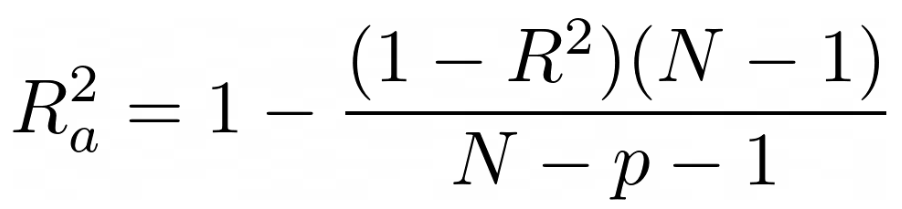

In [35]:
Image('r2_ajustado.png')

Em que N representa o número de amostras, enquanto p representa o número de features (variáveis de entrada do modelo). Podemos perceber que, quanto mais features utilizadas sem aumentar significativamente o valor de R², menor será nosso R-Quadrado Ajustado, o que nos garante uma medida menos enviesada e sempre menor do que o R-Quadrado.

In [36]:
#Coficiente de determinação ajustado (R²-Ajustado)
adj_r2 = (1 - ((1 - r2_score(y_test, y_previsto)) * (len(y_test) - 1)) / 
          (len(y_test) - x_train.shape[1] - 1))
print(adj_r2)

0.7627893900199629


In [40]:
dadosImovel = [[4, 1, 3000]]

preco_aluguel = regressaoMultipla.predict(dadosImovel)

print("Previsão Aluguel: $%.2f" % preco_aluguel)

Previsão Aluguel: $13427.73


In [41]:
regressaoMultipla.coef_

array([[-380.71787589, 1437.30344155,    4.76969023]])

#### Os coeficientes são úteis para determinar qual variável independente tem mais peso. Por exemplo, um coeficiente de 1369.30 impactará o aluguel mais do que um coeficiente de -415.13, com o primeiro impactando os preços positivamente e o último negativamente.

In [42]:
y_previsto = regressaoMultipla.predict(x_test)

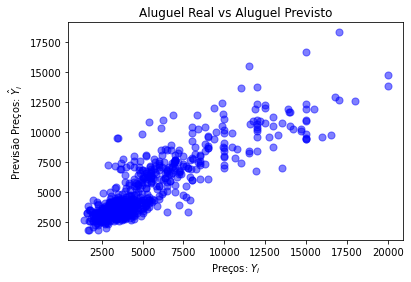

In [43]:
plt.scatter(y_test, y_previsto, c = 'b',  s = 50, alpha = 0.5)

plt.xlabel("Preços: $Y_i$")
plt.ylabel("Previsão Preços: $\hat{Y}_i$")
plt.title("Aluguel Real vs Aluguel Previsto")

plt.show()

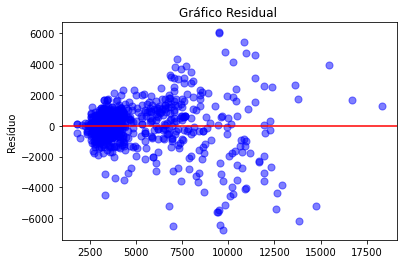

In [44]:
plt.scatter(y_previsto, y_previsto - y_test, c = 'b',  s = 50, alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Resíduo")
plt.title("Gráfico Residual ")
plt.show()

## Outras métricas de avaliação do modelo

### Erro Quadrático Médio (MSE)

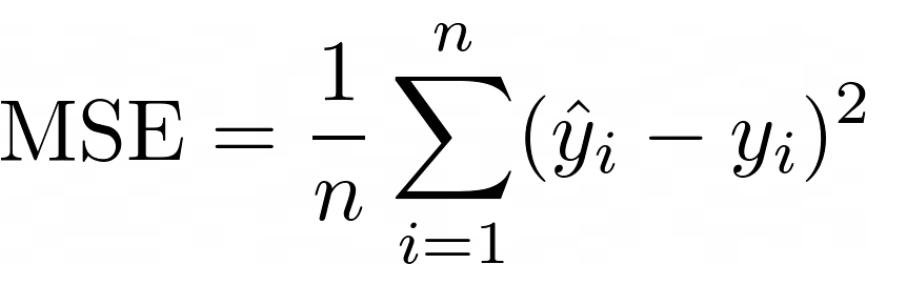

In [45]:
Image('mse.png')

O MSE consiste na média do erro das previsões ao quadrado. Em outras palavras, pega-se a diferença entre o valor predito pelo modelo e o valor real, eleva-se o resultado ao quadrado, faz-se a mesma coisa com todos os outros pontos, soma-os, e dividi-se pelo número de elementos preditos. Quanto maior esse número, pior o modelo.

#### Vantagens e Desvantagens

Uma vez que essa métrica eleva o erro ao quadrado, predições muito distantes do real aumentam o valor da medida muito facilmente, o que a torna uma métrica de avaliação excelente para problemas nos quais grandes erros não são tolerados, como é o caso de exames médicos e projeções de preços.

Entretanto, um ponto negativo do uso dessa métrica é sua falta de interpretabilidade direta, uma vez que, para a predição de valores de unidade u, a unidade do MSE seria u²

In [46]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,y_previsto)
print("%.2f" %MSE)

2357972.64


### Raiz do erro quadrático médio (RMSE)

Tendo em vista essa diferença de unidades, o RMSE entra como uma forma de melhorar a interpretabilidade da métrica, acertando a unidade. Entretanto, essa medida, assim como o MSE, penaliza predições muito distantes da real.

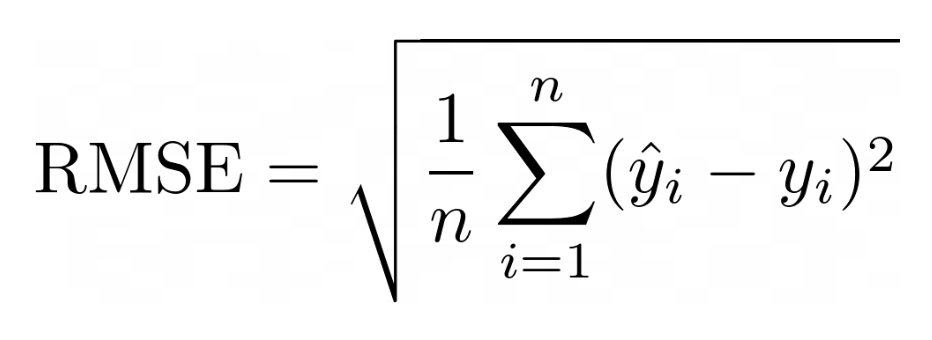

In [47]:
Image('rmse.png')

In [48]:
RMSE = mean_squared_error(y_test,y_previsto,squared=False) 
# argumento 'squared' dado como false nos da o RMSE

# ou podemos simplesmente tirar a raiz quadrada do MSE
RMSE = MSE**0.5

print("%.2f" %RMSE)

1535.57


### Erro Percentual Absoluto Médio (MAPE)

Em contraste com as métricas anteriores, essa medida exprime uma porcentagem, obtida através da divisão da diferença entre predito (ŷ) e real pelo valor real (y).

Assim como o MSE e o RMSE, quanto menor o valor, mais preciso seria o modelo de regressão.

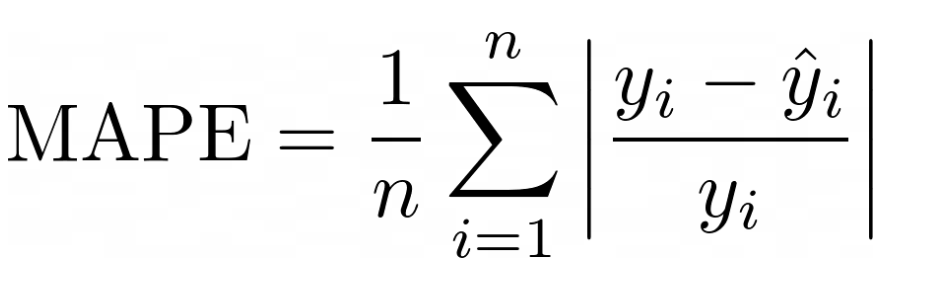

In [49]:
Image('mape.png')

#### Por se tratar de uma porcentagem, essa métrica torna-se extremamente intuitiva, tanto para a interpretação do programador, quanto para a comunicação de resultados com pessoas sem conhecimento técnico. Por exemplo, ter um MAPE=12% significa que, em média, nosso modelo faz previsões que erram por 12% do valor real.

In [50]:
MAPE = np.mean(np.abs((y_test - y_previsto) / y_test)) * 100

print("Valor do MAPE %.2f" %MAPE+"%")

Valor do MAPE 20.88%
